(1040, 780, 3)


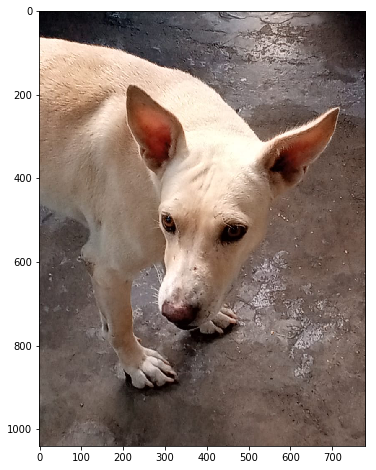

In [2]:
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt

image_raw = imread("/kaggle/input/neighbordog/IMG-20210826-WA0001.jpg")
print(image_raw.shape)

# Displaying the image
plt.figure(figsize=[12,8])
plt.imshow(image_raw)

# height=470px , width=376px

(1040, 780)
1.0


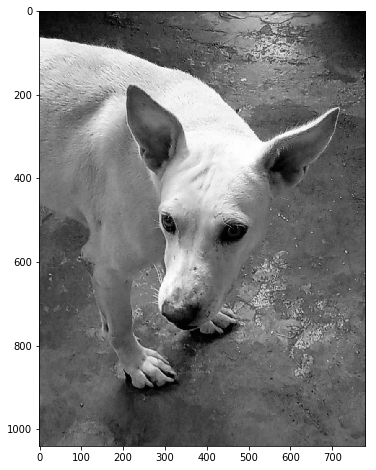

In [3]:
image_sum = image_raw.sum(axis=2)
print(image_sum.shape)

image_bw = image_sum/image_sum.max()
print(image_bw.max())

plt.figure(figsize=[12,8])
plt.imshow(image_bw, cmap=plt.cm.gray)

Number of components explaining 95% variance: 28


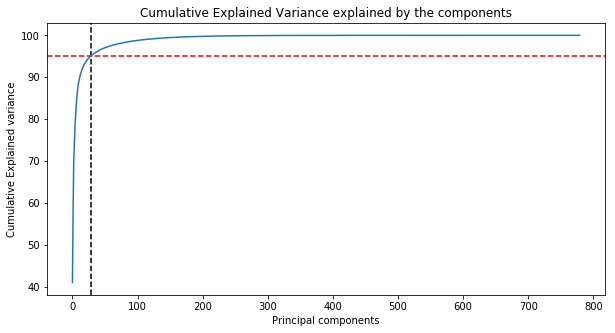

In [4]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance

var_cumu = np.cumsum(pca.explained_variance_ratio_)*100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu>95)
print("Number of components explaining 95% variance: "+ str(k))
#print("\n")

plt.figure(figsize=[10,5])
plt.title('Cumulative Explained Variance explained by the components')
plt.ylabel('Cumulative Explained variance')
plt.xlabel('Principal components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
ax = plt.plot(var_cumu)


### Reconstructing the b/w image with the limited number of components (28)
1. First, we'll use the `fit_transform` method from the IncrementalPCA module to first find the 38 PCs and transform and represent the data in those 28 new components/columns.  
2. Next, we'll reconstruct the original matrix from these 28 components using the `inverse_transform` method.  

We'll then plot the image to visually assess the quality of it.

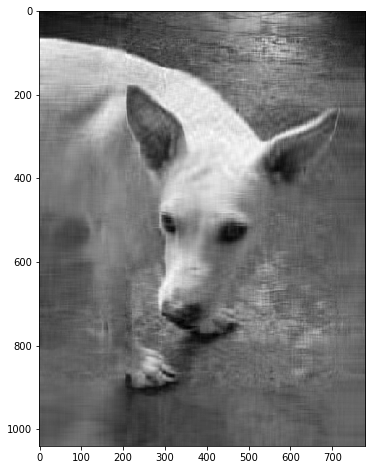

In [5]:
ipca = IncrementalPCA(n_components=k)
image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))

# Plotting the reconstructed image
plt.figure(figsize=[12,8])
plt.imshow(image_recon,cmap = plt.cm.gray)

Well, for 95% variance, we expected a clearer image, didn't we? Note that we got all the major elements captured for sure - you can still very well identify objects.

What's missing is the clarity - well, maybe it's the finer details in the visuals that make an image appealing and clear.

#### Let's try out a different value of k - 150 components  

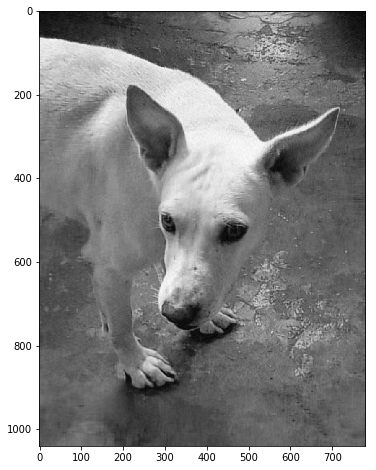

In [6]:
# Function to reconstruct and plot image for a given number of components

def plot_at_k(k):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon,cmap = plt.cm.gray)
    

k = 150
plt.figure(figsize=[12,8])
plot_at_k(100)

Much better! Just a little bit grainy, but the details are all there. On a smaller resolution, you probably won't be able to detect the differences from the original greyscale image very easily.

### Reconstructing and plotting for different number of components
- we'll try out different number of components, begining from 1, ending at 100
- we'll reconstruct the image at each `k` and plot the images

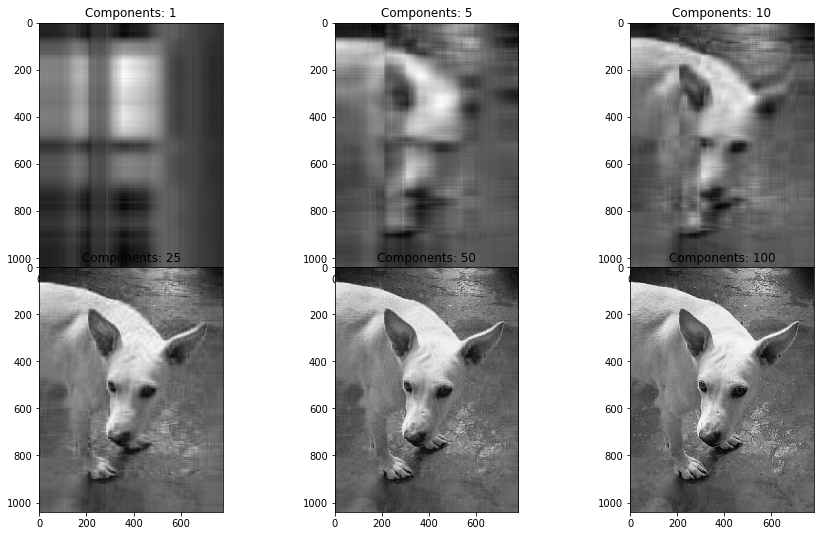

In [16]:
ks = [1, 5, 10, 25, 50, 100]

plt.figure(figsize=[15,9])

for i in range(6):
    plt.subplot(2,3,i+1)
    plot_at_k(ks[i])
    plt.title("Components: "+str(ks[i]))

plt.subplots_adjust(wspace=0.2, hspace=0.0)
plt.show()